# 0. Imports

In [7]:
# ************* Misc. *************
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from prettytable import PrettyTable

# ************* Plotting *************
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding="ISO-8859-1")

# 1. Data Analysis

## 1.1 Dataset

In [9]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [10]:
df.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


## 1.1.1 Missing Values

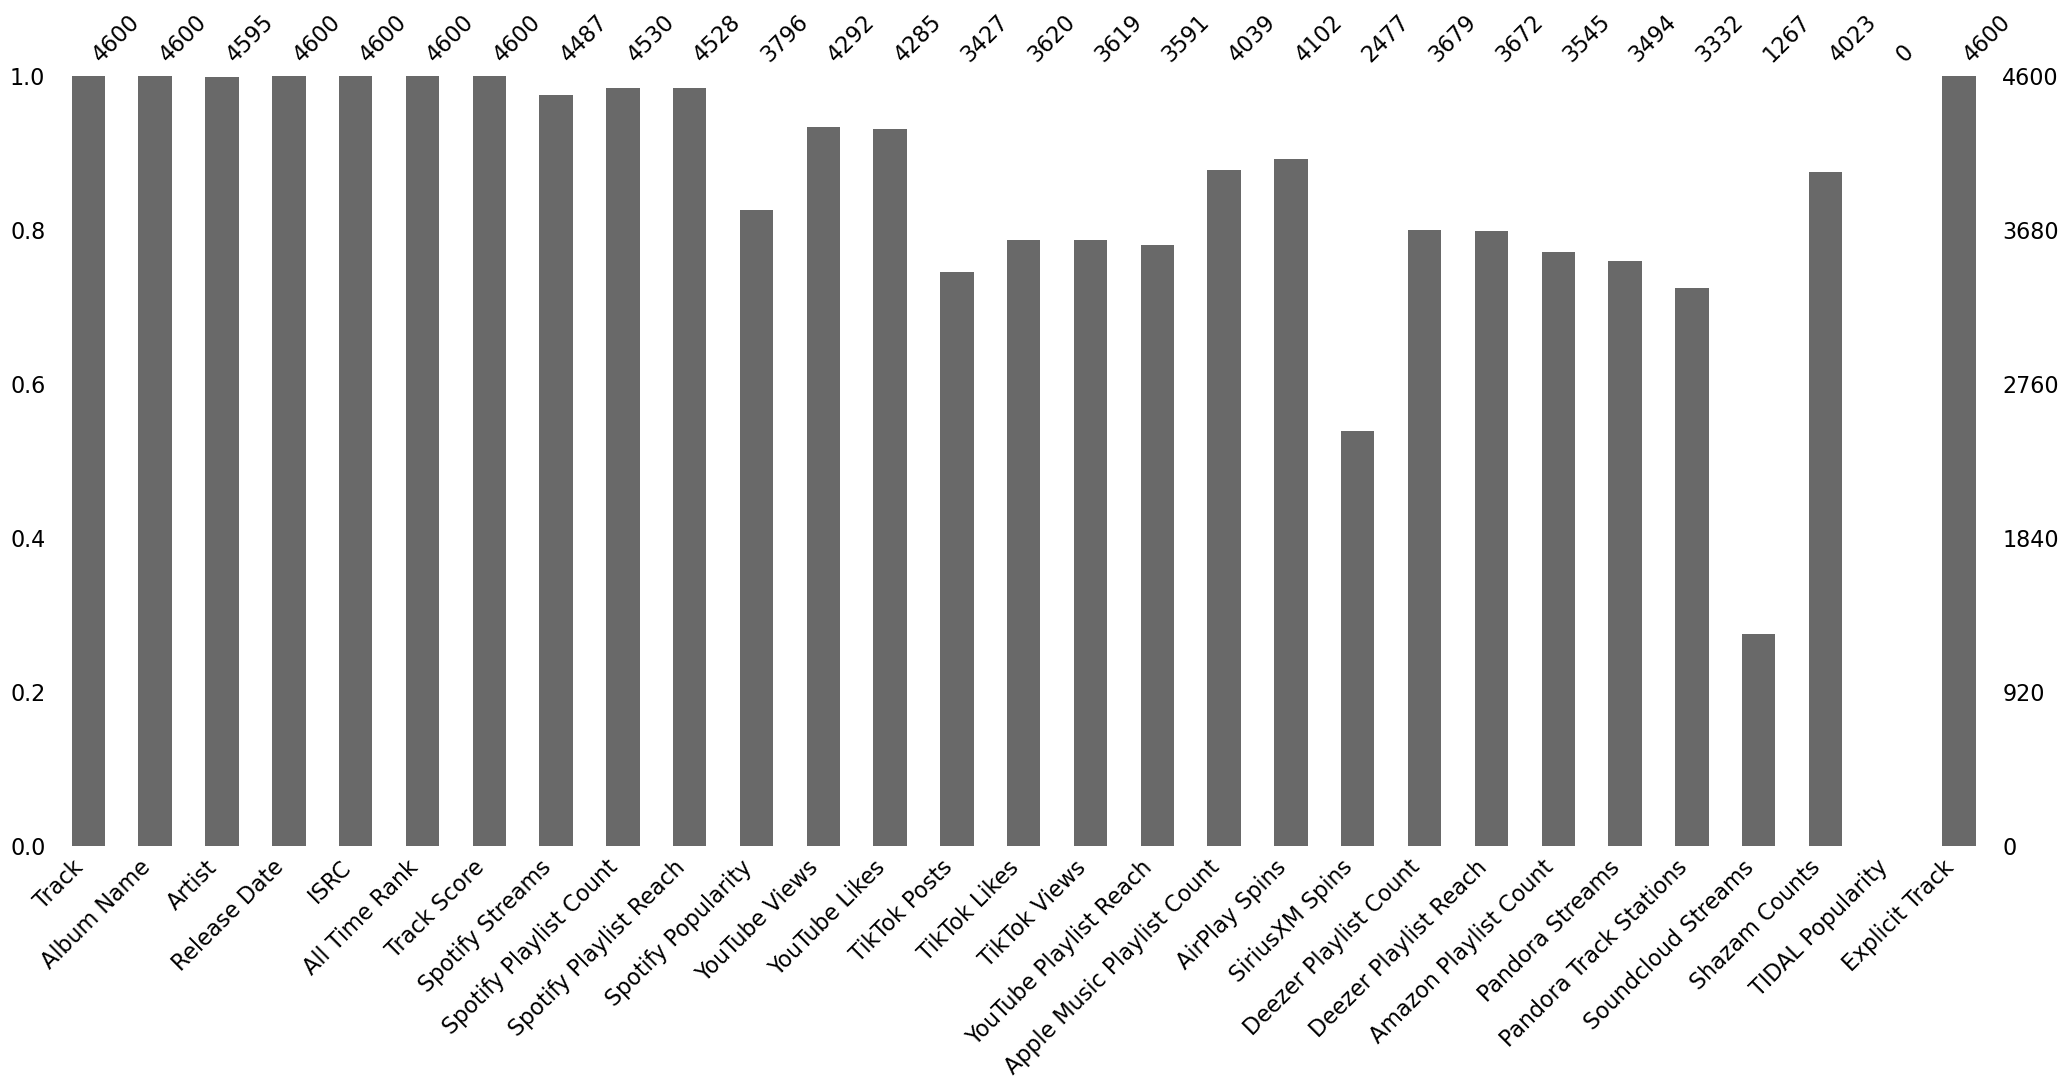

In [11]:
msno.bar(df)

plt.show()

# 1.2 Data Types of each Feature

In [12]:
table = PrettyTable()
table.field_names = ['Feature', 'Data Type']

for column in df.columns:
    column_dtype = str(df[column].dtype)
    table.add_row([column, column_dtype])

print(table)

+----------------------------+-----------+
|          Feature           | Data Type |
+----------------------------+-----------+
|           Track            |   object  |
|         Album Name         |   object  |
|           Artist           |   object  |
|        Release Date        |   object  |
|            ISRC            |   object  |
|       All Time Rank        |   object  |
|        Track Score         |  float64  |
|      Spotify Streams       |   object  |
|   Spotify Playlist Count   |   object  |
|   Spotify Playlist Reach   |   object  |
|     Spotify Popularity     |  float64  |
|       YouTube Views        |   object  |
|       YouTube Likes        |   object  |
|        TikTok Posts        |   object  |
|        TikTok Likes        |   object  |
|        TikTok Views        |   object  |
|   YouTube Playlist Reach   |   object  |
| Apple Music Playlist Count |  float64  |
|       AirPlay Spins        |   object  |
|       SiriusXM Spins       |   object  |
|   Deezer 

# 2. Feature Engineering

In [13]:
def feature_engineering(df):
    # Convert 'release date' to datetime format
    df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%Y')

    # Create a new column 'Year' by extracting the year from 'release date'
    df['Year'] = df['Release Date'].dt.year
    df = df.drop(columns=["TIDAL Popularity"])
    
    return df
    
df = feature_engineering(df)
df.describe()

,Release Date,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track,Year
count,4600,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,4600.000000,4600.000000
mean,2021-01-27 07:48:18.782608896,41.844043,63.501581,54.60312,32.310954,25.348942,0.358913,2020.616739
min,1987-07-21 00:00:00,19.400000,1.000000,1.00000,1.000000,1.000000,0.000000,1987.000000
25%,2019-07-16 18:00:00,23.300000,61.000000,10.00000,5.000000,8.000000,0.000000,2019.000000
50%,2022-06-01 00:00:00,29.900000,67.000000,28.00000,15.000000,17.000000,0.000000,2022.000000
75%,2023-08-11 00:00:00,44.425000,73.000000,70.00000,37.000000,34.000000,1.000000,2023.000000
max,2024-06-14 00:00:00,725.400000,96.000000,859.00000,632.000000,210.000000,1.000000,2024.000000
std,NaN,38.543766,16.186438,71.61227,54.274538,25.989826,0.479734,3.611707


# 3. Data Visualization

## 3.1 Average Track Score for each Year

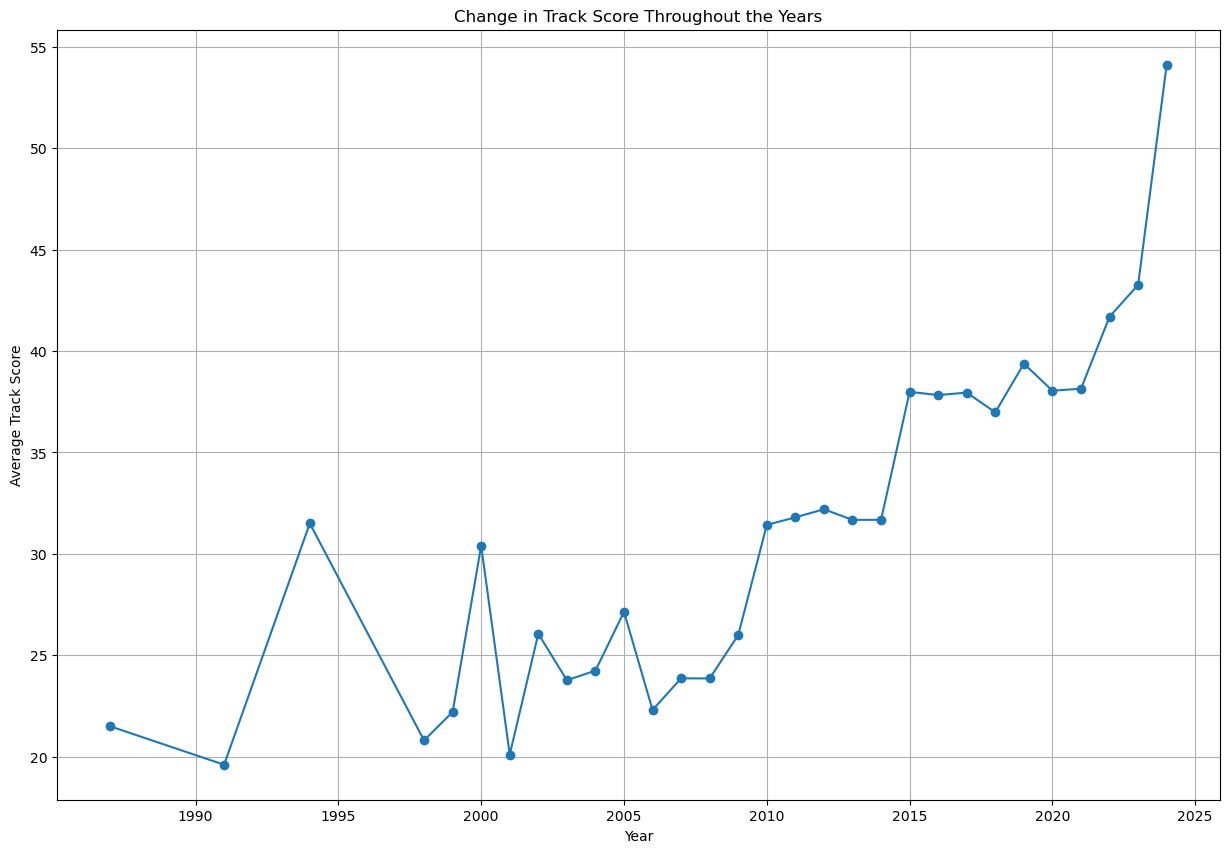

In [14]:
# Group by 'Year' and calculate the average 'Track Score' for each year
avg_track_score_per_year = df.groupby('Year')['Track Score'].mean()

plt.figure(figsize=(15, 10))
avg_track_score_per_year.plot(kind='line', marker='o')
plt.title('Change in Track Score Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Average Track Score')
plt.grid(True)
plt.show()

## 3.2 The best Track Score for each year

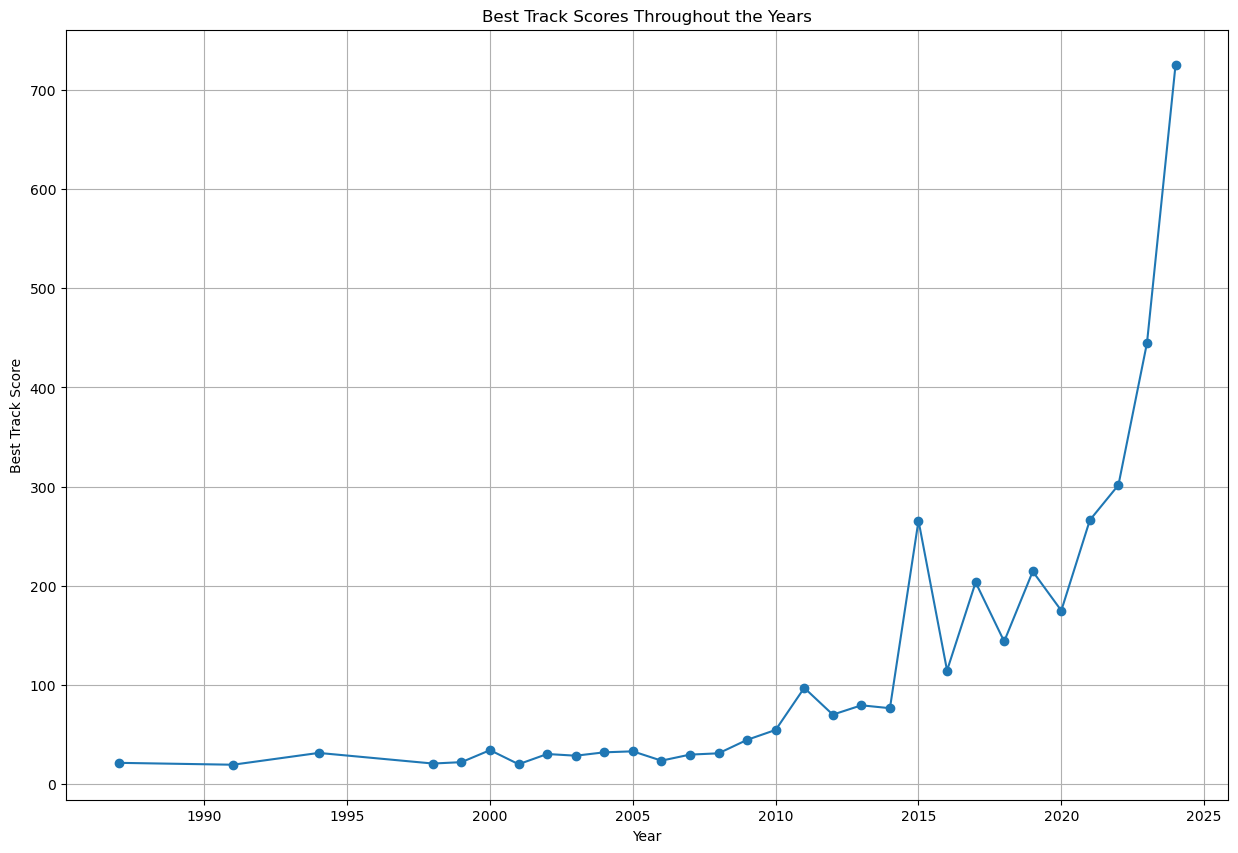

In [15]:
# Group by 'Year' and get the best 'Track Score' for each year
best_track_score_per_year = df.groupby('Year')['Track Score'].max()

plt.figure(figsize=(15, 10))
best_track_score_per_year.plot(kind='line', marker='o')
plt.title('Best Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Best Track Score')
plt.grid(True)
plt.show()

## 3.3 The worst Track Score for each year

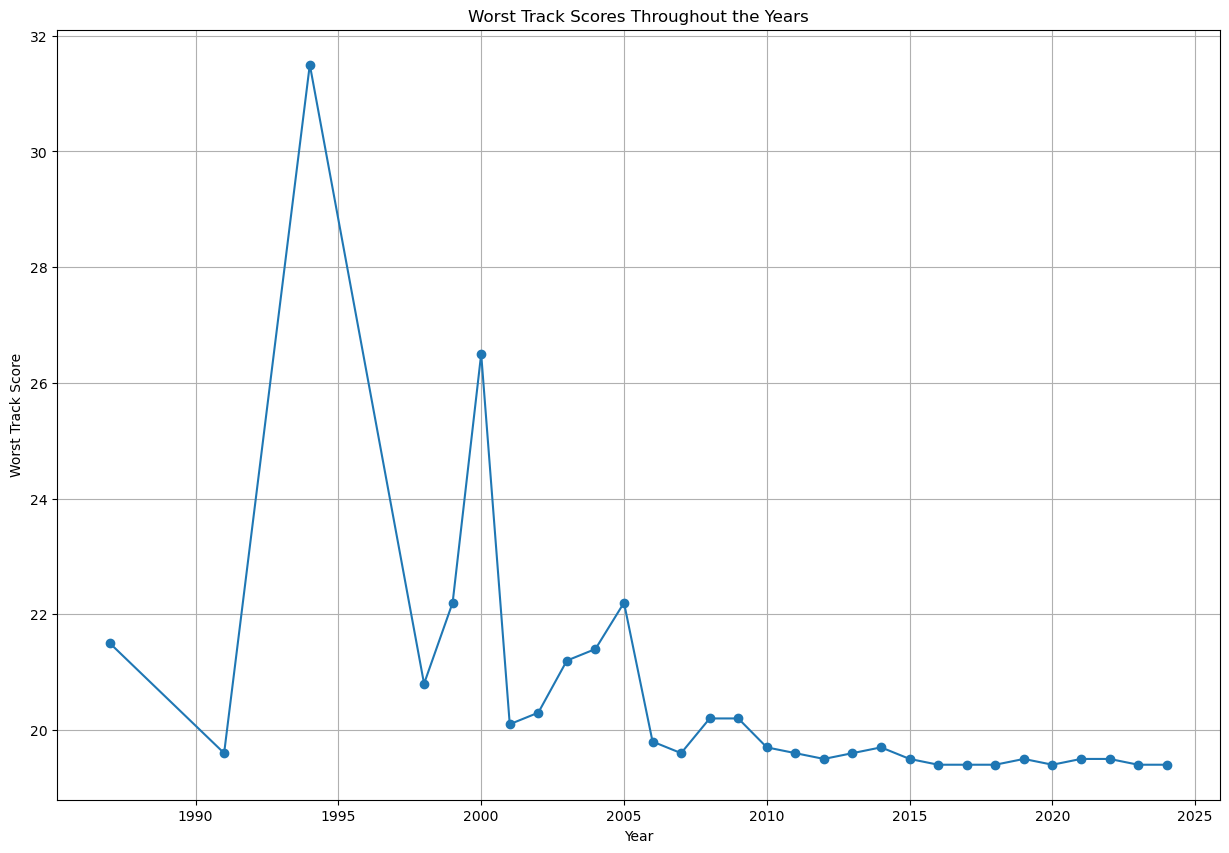

In [16]:
# Group by 'Year' and get the worst 'Track Score' for each year
worst_track_score_per_year = df.groupby('Year')['Track Score'].min()

plt.figure(figsize=(15, 10))
worst_track_score_per_year.plot(kind='line', marker='o')
plt.title('Worst Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Worst Track Score')
plt.grid(True)
plt.show()

## 3.4 Number of Tracks every Year

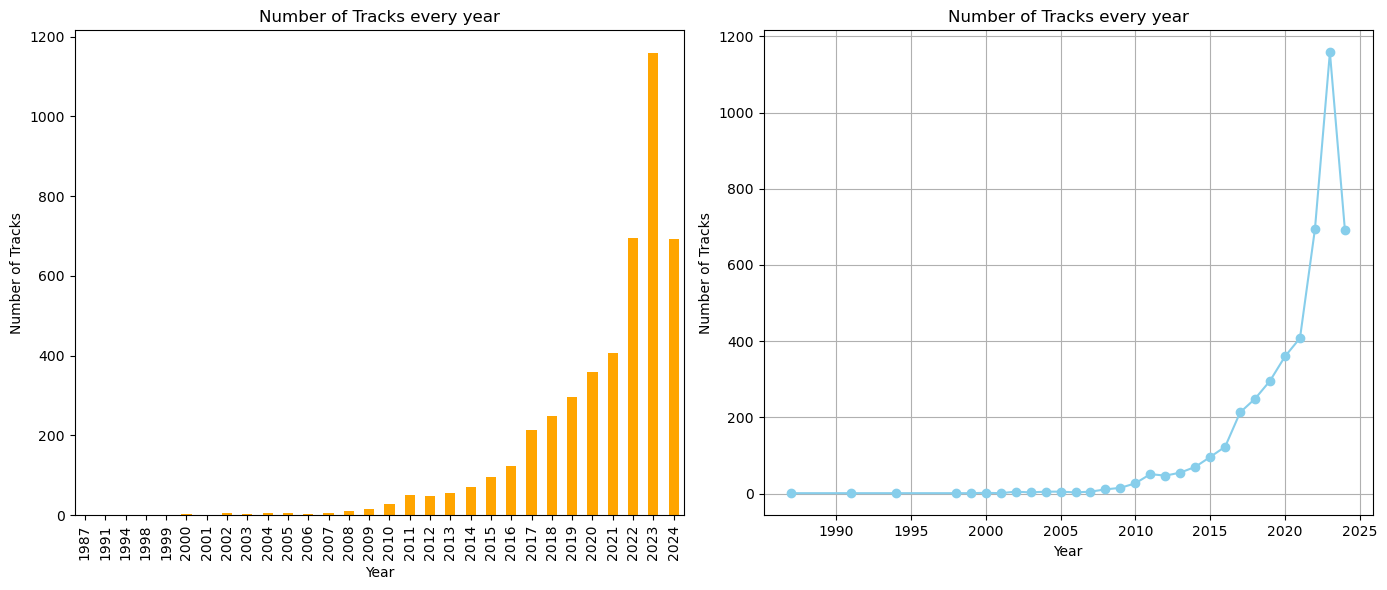

In [17]:
# Group by 'Year' and get the number of Tracks for each year
tracks_per_year = df.groupby('Year')['Track'].count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar Chart
tracks_per_year.plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Number of Tracks every year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Tracks')

# Line Chart
tracks_per_year.plot(kind='line', ax=axes[1], color='skyblue', marker='o')
axes[1].set_title('Number of Tracks every year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Tracks')
axes[1].grid(True)

plt.tight_layout()
plt.show()


## 3.5 Interest in Explicit Music

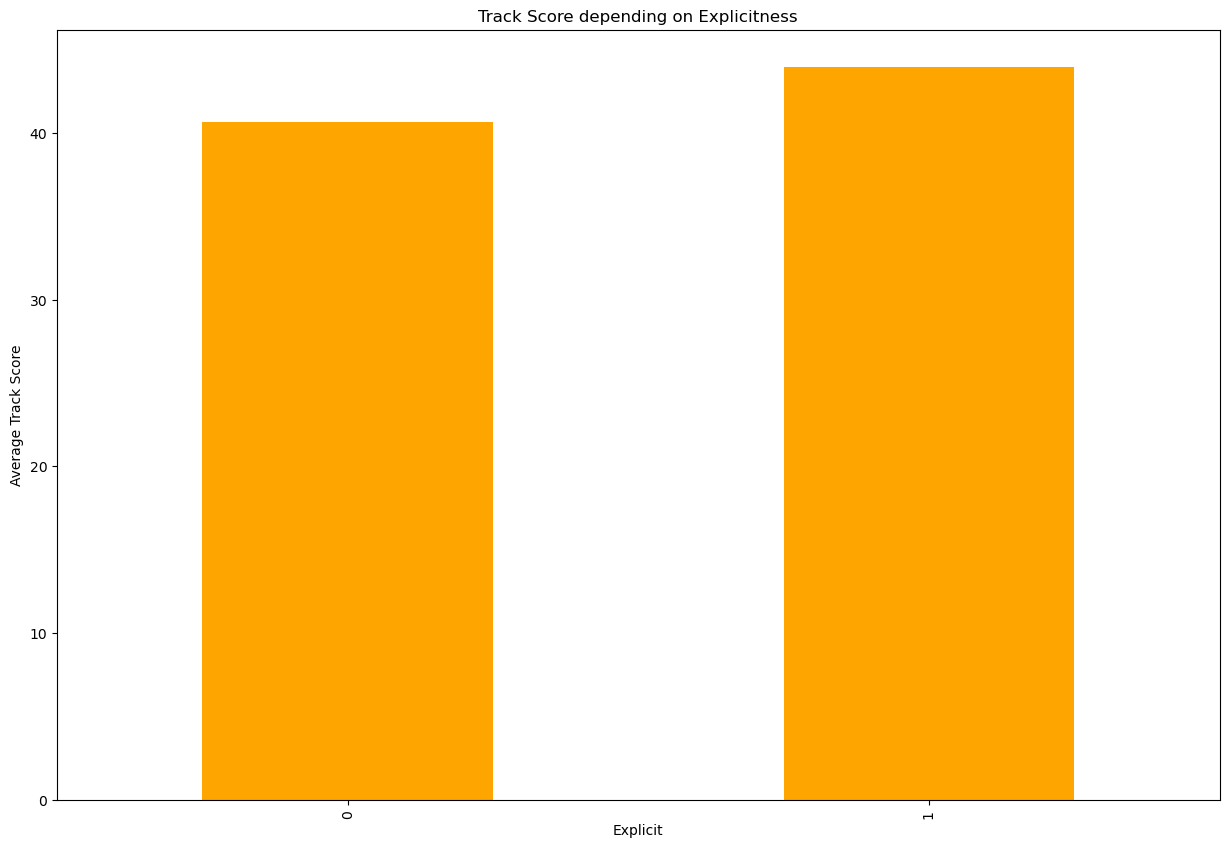

In [18]:
# Calculate the average 'Track Score' based on Explicitness
explicit_track_scores = df.groupby('Explicit Track')['Track Score'].mean()

plt.figure(figsize=(15, 10))
explicit_track_scores.plot(kind='bar', color='orange')
plt.title('Track Score depending on Explicitness')
plt.xlabel('Explicit')
plt.ylabel('Average Track Score')
plt.show()

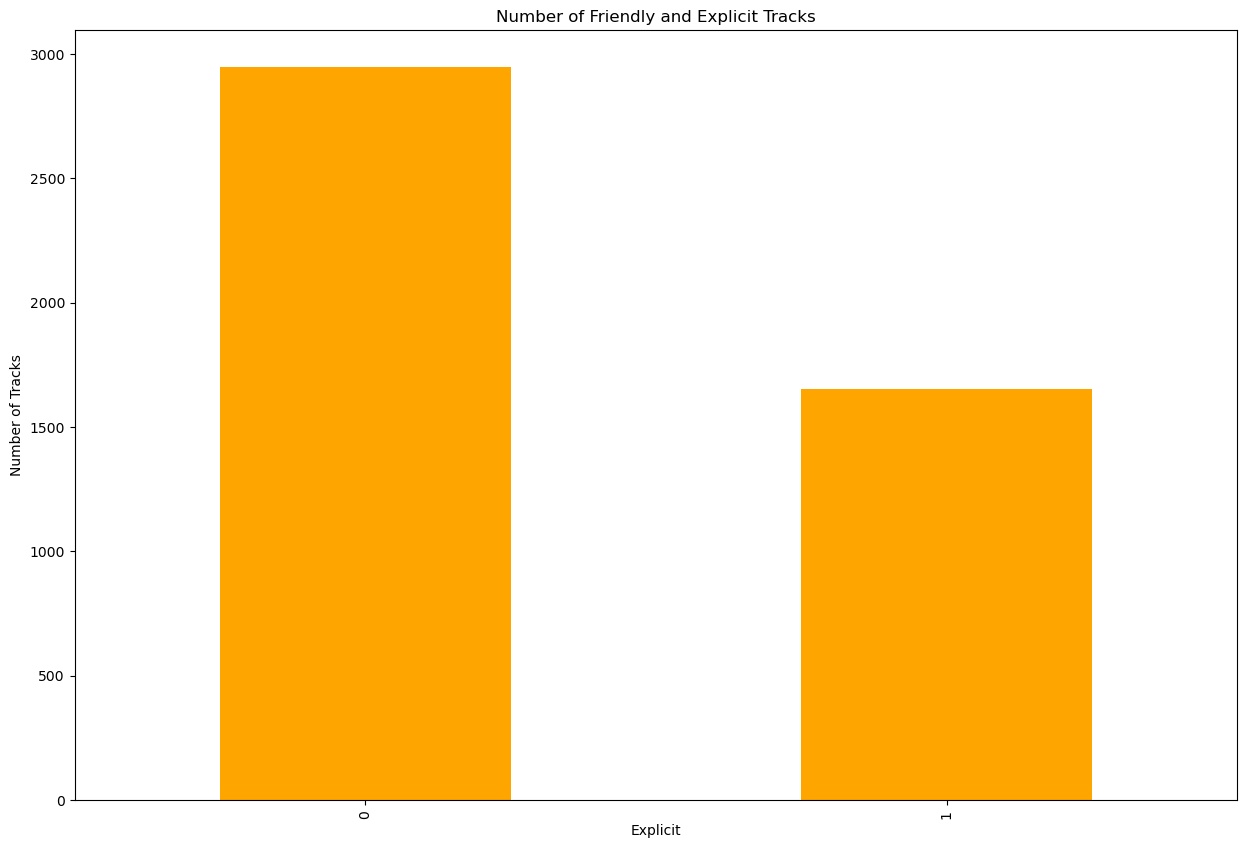

In [19]:
# Count the number of Explicit Tracks
explicit_track_scores = df.groupby('Explicit Track')['Track'].count()

plt.figure(figsize=(15, 10))
explicit_track_scores.plot(kind='bar', color='orange')
plt.title('Number of Friendly and Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Number of Tracks')
plt.show()

## 3.6 Change in Explicitness throughout the Years

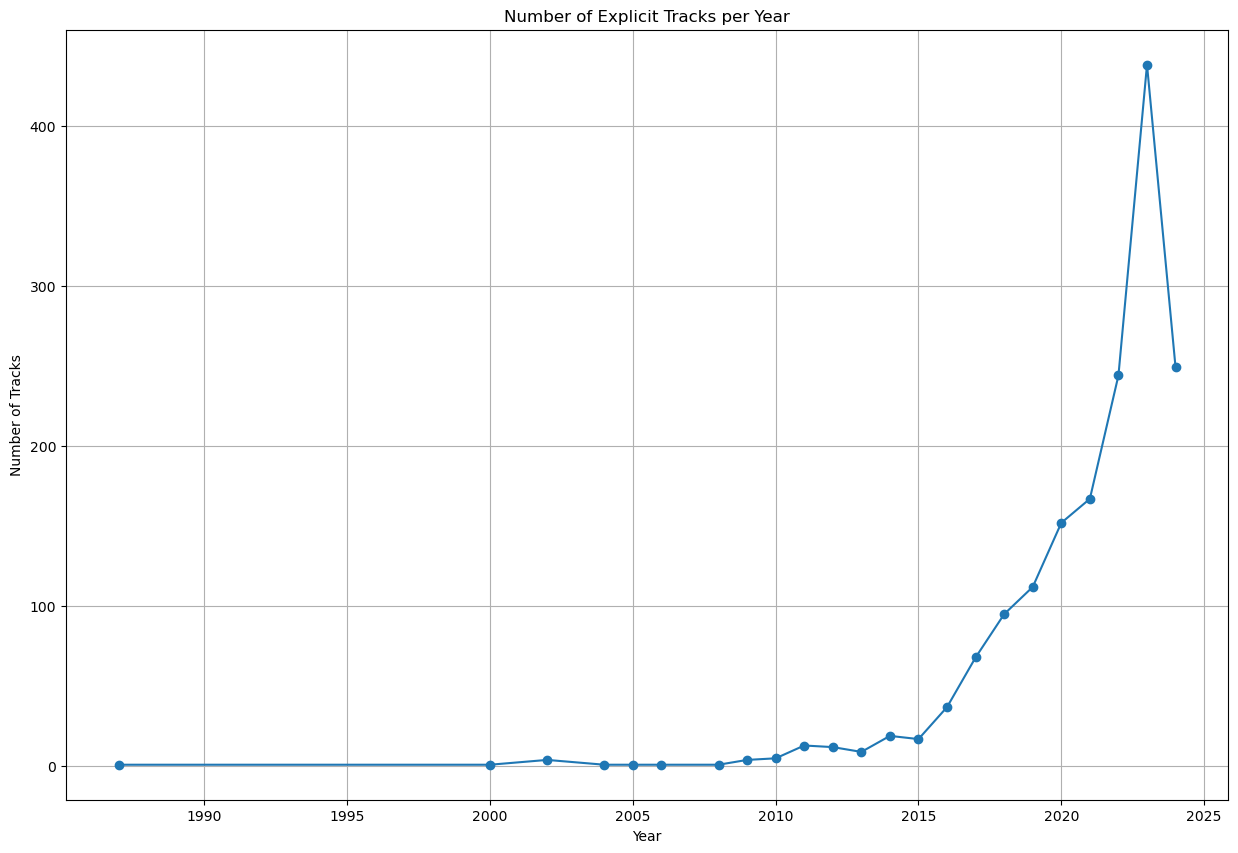

In [20]:
# Group by 'Year' and calculate the number of Explicit Tracks for each year
explicit_tracks = df[df['Explicit Track'] == 1]
explicit_tracks_per_year = explicit_tracks.groupby('Year')['Track'].count()

plt.figure(figsize=(15, 10))
explicit_tracks_per_year.plot(kind='line', marker='o')
plt.title('Number of Explicit Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

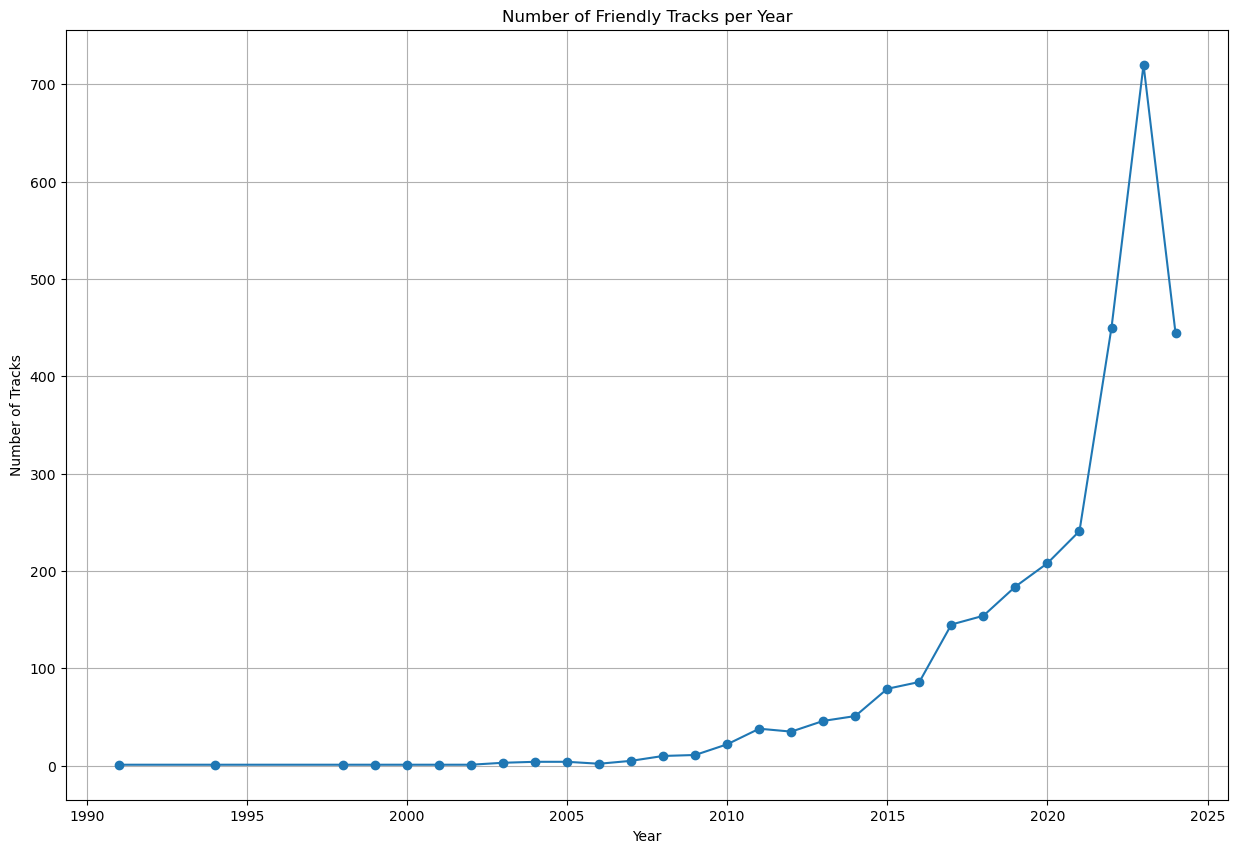

In [21]:
# Group by 'Year' and calculate the number of Explicit Tracks for each year
friendly_tracks = df[df['Explicit Track'] == 0]
friendly_tracks_per_year = friendly_tracks.groupby('Year')['Track'].count()

plt.figure(figsize=(15, 10))
friendly_tracks_per_year.plot(kind='line', marker='o')
plt.title('Number of Friendly Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()